In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
import theano
import theano.tensor as T
import cPickle as pickle
import os
load_path = '../../final_saved//boston/sgd'
data_path = '../../../data/boston'
from plot_style import init_rc_params
init_rc_params()

heatmap

2.5e-05_1000.0.pckl
5e-05_1e+09.pckl
5e-05_10.0.pckl
2.5e-06_1e+07.pckl
5e-06_1e+07.pckl
1e-06_100000.0.pckl
1e-06_10.0.pckl
1e-05_10.0.pckl
5e-06_100000.0.pckl
2.5e-06_1000.0.pckl
5e-06_1000.0.pckl
2.5e-05_10.0.pckl
2.5e-06_100000.0.pckl
2.5e-06_10.0.pckl
5e-06_1e+09.pckl
2.5e-05_100000.0.pckl
2.5e-05_1e+09.pckl
1e-05_1e+09.pckl
5e-05_1e+07.pckl
1e-05_100000.0.pckl
2.5e-06_1e+09.pckl
5e-05_1000.0.pckl
5e-05_100000.0.pckl
1e-05_1e+07.pckl
1e-06_1000.0.pckl
1e-06_1e+07.pckl
1e-06_1e+09.pckl
2.5e-05_1e+07.pckl
1e-05_1000.0.pckl
5e-06_10.0.pckl
best alpha 1e+09 lr 1e-06
[[ -7921.20357121  -8161.77966739  -8261.1301274   -8943.8170792
  -10544.30958904 -12025.47462473]
 [ -7868.83917665  -7980.94449415  -8519.26245062  -9097.16277339
  -10630.65829414 -12029.65424024]
 [ -7776.52081028  -8012.70975201  -8495.37587522  -9179.44982623
  -10408.12243806 -12074.60915718]
 [ -7950.70678389  -8172.47760449  -8373.31741489  -9163.16422852
  -10622.73410926 -12292.96454825]
 [ -7702.39980758  -803

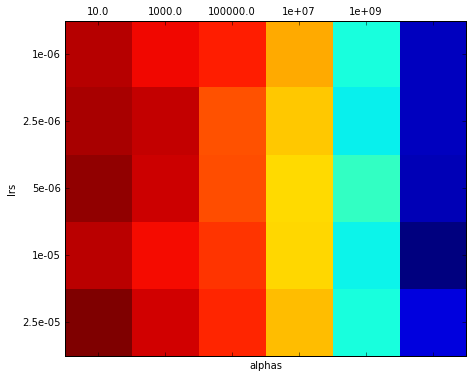

In [3]:
results = []
for f in os.listdir(load_path):
    print f
    with open(os.path.join(load_path, f), 'rb') as inp:
        try:
            data = pickle.load(inp)
            results.append((data['lr'], data['alpha'], data['validation'][-1]))
        except:
            print 'bad', f 
        
alphas = sorted(list(set([r[1] for r in results])))
lrs = sorted(list(set([r[0] for r in results])))
matrix = np.zeros((len(alphas), len(lrs)))*(-100000)
for r in results:
    lr_id = lrs.index(r[0])
    a_id = alphas.index(r[1])
    q = r[2]
    matrix[a_id, lr_id] = q
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(matrix)
plt.xlabel('alphas')
plt.ylabel('lrs')
ax.set_xticklabels(['']+  [str(a) for a in alphas])
ax.set_yticklabels([''] + [str(l) for l in lrs])
best = np.where(matrix == np.max(matrix))
print 'best', 'alpha', alphas[best[0][0]], 'lr', lrs[best[1][0]]
print matrix

convergence

104


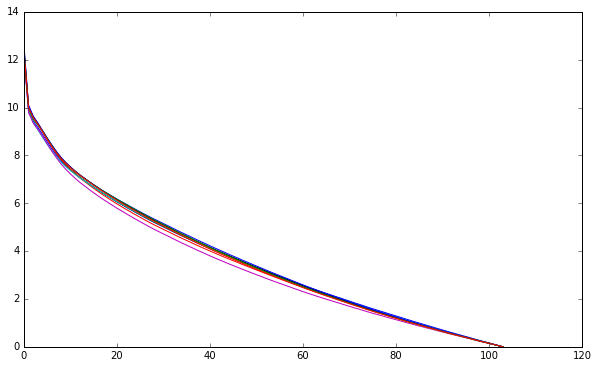

In [11]:
with open(os.path.join(load_path, '1e-07_1e+09.pckl')) as inp:
    data = pickle.load(inp)
print len(data['params'])
optima = data['params'][-1]
convs = [[] for _ in range(len(optima))]
for i in xrange(len(optima)):
    for p in data['params']:
        convs[i].append(np.linalg.norm(p[i]-optima[i]))
    plt.plot(convs[i])

stability (noise in data)

0.0 11.0608524591 0.269981468293
0.1 16.0776665458 0.690514179846
0.2 30.0996013631 0.929286247158
0.3 52.2799843284 2.32236282826
0.4 79.9829425 4.95615082562
0.5 100.700496239 5.84517203867
0.6 132.607448324 7.28402873243
0.7 160.260560809 12.4210741661
0.8 196.882316206 12.5151553572
0.9 218.641530573 12.2018600844
1.0 250.551618683 10.3487052394
1.1 262.974126459 16.060076384
1.2 296.98879739 13.2121535214
1.3 325.053031567 16.1401872807
1.4 355.451078817 31.1614846376
1.5 369.543581593 29.3900367083
1.6 404.430044441 35.0855146915
1.7 416.188012077 19.030825538
1.8 434.709537993 29.7135591804
1.9 445.129315382 25.0093122359


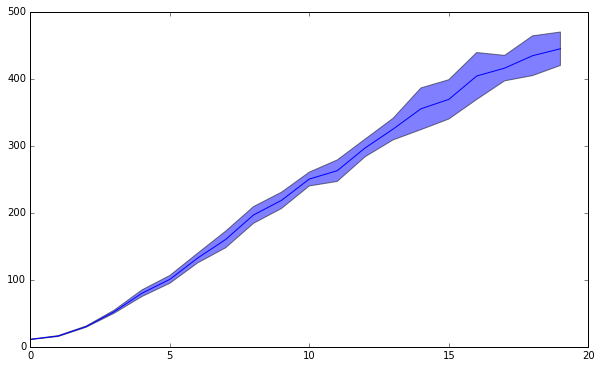

In [14]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
with open(os.path.join(load_path, '1e-07_1e+09.pckl')) as inp:
    data = pickle.load(inp)
if len(data['params'])==10**4:
    params = data['params'][-1]
else:    
    params = data['params'][-6]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        result.append(monitor(test_x + np.random.randn(test_x.shape[0],test_x.shape[1])*noise, test_y, p))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


stability (noise in params)

0.0 11.0608524591 0.269981468293
0.1 14.0522780532 2.63586444204
0.2 24.9845183811 8.28744574776
0.3 52.2107420037 24.2970771129
0.4 74.9095887916 39.1423442172
0.5 97.2499210556 62.8182376323
0.6 107.797250476 76.88631505
0.7 177.546917424 122.133036906
0.8 190.484415259 85.4484053316
0.9 341.104854182 272.022590435
1.0 180.178646243 98.6913498622
1.1 293.047718026 200.950410493
1.2 306.547756659 182.528093818
1.3 401.959387662 297.787475647
1.4 379.503414404 196.601986813
1.5 303.466863899 175.15557006
1.6 463.523134519 363.544460607
1.7 315.919461339 270.378261316
1.8 668.598595501 538.481134817
1.9 382.171702295 246.619562148


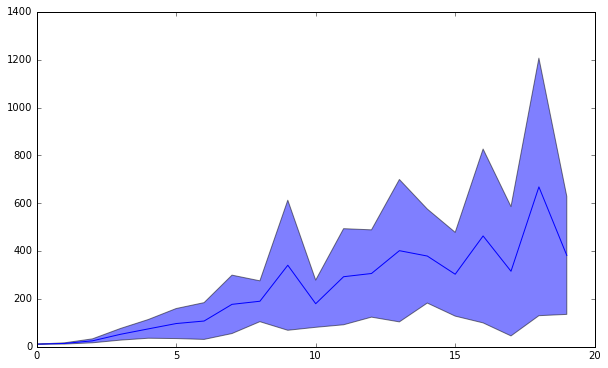

In [16]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
with open(os.path.join(load_path, '1e-07_1e+09.pckl')) as inp:
    data = pickle.load(inp)
if len(data['params'])==10**4:
    params = data['params'][-1]
else:
    params = data['params'][-6]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        result.append(monitor(test_x, test_y, p  + np.random.randn(p.shape[0])*noise))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


learning curve

0
50
100
150
max 3988.92563106
min 257269.748438


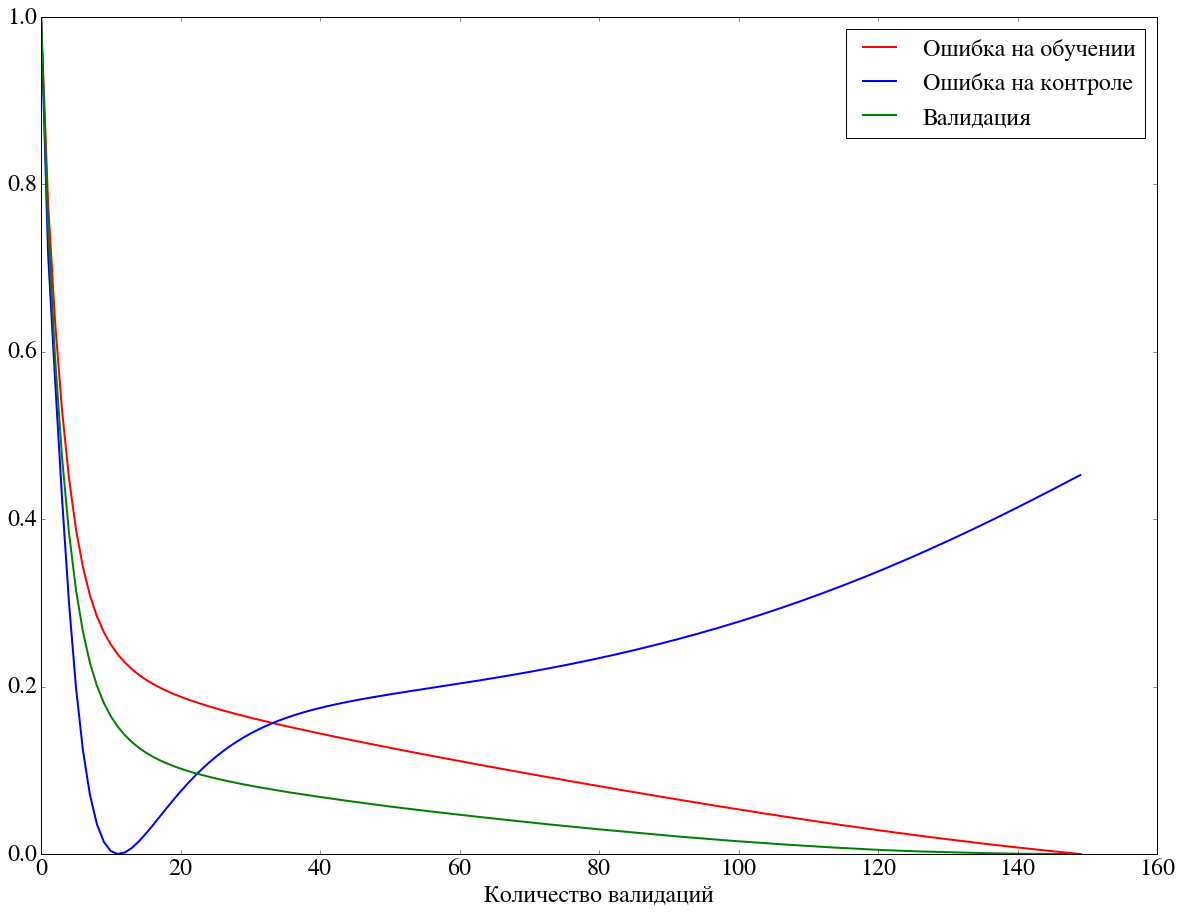

In [3]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))

train_x = np.load(os.path.join(data_path, 'train_x.npy'))
train_y = np.load(os.path.join(data_path, 'train_y.npy'))
results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path, '1e-06_1e+09.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.log(1 + T.exp(T.dot(X, W1)+b1))
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost,allow_input_downcast=True)
results =[]
results_std = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    for p in params:
        result_train.append( monitor(train_x, train_y, p))
        result_test.append(monitor(test_x, test_y, p))
        result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)
    
    #print result_validation
min_ = np.min([results_train, results_test])
max_ = np.max([results_train, results_test])
print 'max', min_
print 'min', max_
results_train = np.array(results_train[1:])
results_test = np.array(results_test[1:])
results_validation = -np.array(results_validation[1:])
results_train = (results_train - np.min(results_train)) / ((np.max(results_train) - np.min(results_train)))
results_test = (results_test - np.min(results_test)) / ((np.max(results_test) - np.min(results_test)))
results_validation = (results_validation - np.min(results_validation)) / ((np.max(results_validation) - np.min(results_validation)))
plt.plot(results_train,'r', label= u'Ошибка на обучении')
plt.plot(results_test,'b', label=u'Ошибка на контроле')
plt.plot(results_validation, 'g', label=u'Валидация')
plt.legend(loc='best')
plt.xlabel(u'Количество валидаций', fontsize=24)


0
50
100


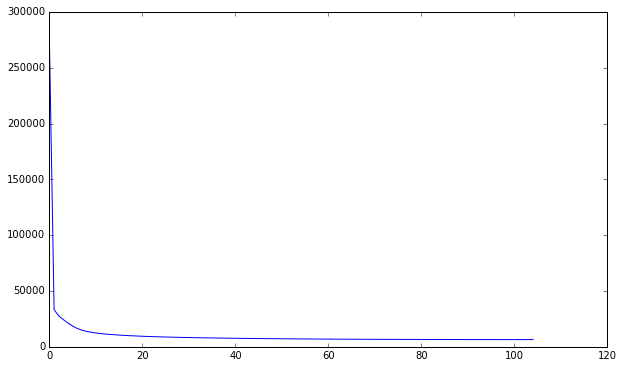

In [7]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))

train_x = np.load(os.path.join(data_path, 'train_x.npy'))
train_y = np.load(os.path.join(data_path, 'train_y.npy'))

results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path,'1e-07_100.0.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    for p in params:
        result_train.append( monitor(train_x, train_y, p))
        result_test.append(monitor(test_x, test_y, p))
        result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)

results_validation = np.array(results_validation)
plt.plot(-results_validation)
#plt.ylim((0,1000))
